In [2]:
#import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
import os
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

In [2]:
#Carica i dataset di train e test

dataset_path = "/Volumes/Mac/DatasetSP/preprocessed/train_test_split/"
train_df = pd.read_csv(dataset_path + "train_df.csv")
test_df = pd.read_csv(dataset_path + "test_df.csv")

#Carico le features selezionate con tsfresh
tsfresh_features = pd.read_csv("/Volumes/Mac/DatasetSP/preprocessed/feature_selected/tsfresh_selected_features.csv")

In [3]:
# Separa le feature e il target
X_train = train_df.drop(columns=["Subject", "Test", "Trial", "Bout", "Position", "Unnamed: 0"])
y_train = train_df["Position"]
X_test = test_df.drop(columns=["Subject", "Test", "Trial", "Bout", "Position", "Unnamed: 0"])
y_test = test_df["Position"]

Selezione con Random Forest...


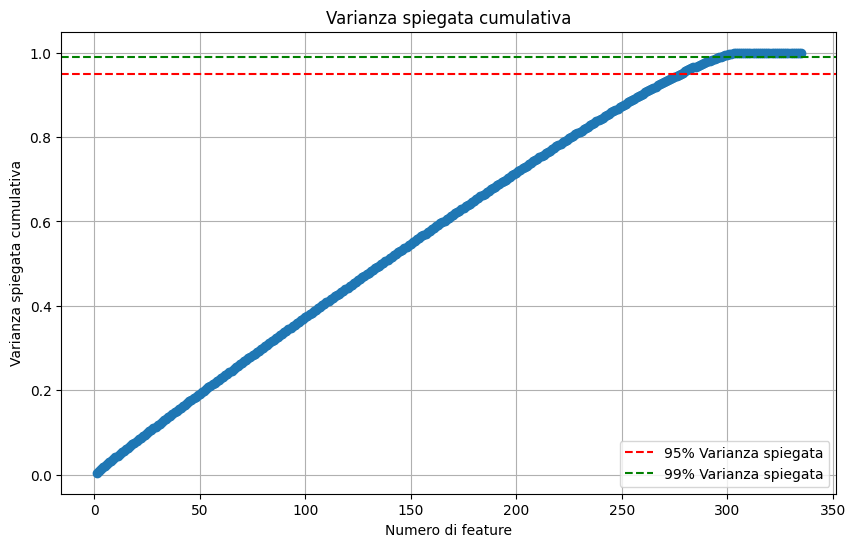

In [6]:
# ============================
# 2. Importanza delle feature con Random Forest
# ============================
print("Selezione con Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Ordina le feature in base all'importanza
rf_feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Supponiamo di avere un DataFrame con importanza delle feature
feature_importances = rf_feature_importances["Importance"].values  # Dal Random Forest
sorted_importances = np.sort(feature_importances)[::-1]  # Ordina decrescente

# Calcola la varianza spiegata cumulativa
cumulative_importance = np.cumsum(sorted_importances)
cumulative_importance /= cumulative_importance[-1]  # Normalizza

# Visualizza il grafico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Varianza spiegata")
plt.axhline(y=0.99, color="g", linestyle="--", label="99% Varianza spiegata")
plt.title("Varianza spiegata cumulativa")
plt.xlabel("Numero di feature")
plt.ylabel("Varianza spiegata cumulativa")
plt.legend()
plt.grid()
plt.show()

In [10]:
# Feature selection based on ANOVA F-value

print("Selezione con ANOVA F-value...")
construction_set = pd.concat([train_df, test_df], axis=0)
X_anova = construction_set.drop(columns=["Subject", "Test", "Trial", "Bout", "Position", "Unnamed: 0"])
y_anova = construction_set["Position"]

f_scores, p_values = f_classif(X_anova, y_anova)

# Crea un DataFrame con i risultati
anova_results = pd.DataFrame({
    "Feature": X_anova.columns,
    "F-Score": f_scores,
    "p-Value": p_values
}).sort_values(by="F-Score", ascending=False)

print(anova_results)

# Seleziona le feature con p-Value < 0.05
selected_features = anova_results[anova_results["p-Value"] < 0.05]["Feature"]

print(f"Feature selezionate: {len(selected_features)}")

Selezione con ANOVA F-value...
                                               Feature    F-Score  \
214        value__fft_coefficient__attr_"abs"__coeff_3  32.251237   
87                value__ar_coefficient__coeff_3__k_10  31.715891   
213        value__fft_coefficient__attr_"abs"__coeff_1  29.233215   
212        value__fft_coefficient__attr_"abs"__coeff_0  26.933244   
301  value__agg_linear_trend__attr_"intercept"__chu...  26.775230   
..                                                 ...        ...   
35             value__large_standard_deviation__r_0.05        NaN   
39                       value__autocorrelation__lag_0        NaN   
43               value__partial_autocorrelation__lag_0        NaN   
288     value__range_count__max_1000000000000.0__min_0        NaN   
327                            value__count_above__t_0        NaN   

          p-Value  
214  5.551530e-33  
87   2.062206e-32  
213  9.015703e-30  
212  2.497128e-27  
301  3.673568e-27  
..            ...  


/Users/giorgio/Desktop/SmartphonePositioning/venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  2  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  39  43
 288 327] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/giorgio/Desktop/SmartphonePositioning/venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [12]:
# Lista delle feature costanti identificate durante ANOVA
constant_features = [2, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 43, 288, 327]

# Seleziona le colonne corrispondenti
constant_features_names = X_anova.columns[constant_features]

# Utilizza il metodo describe() per ottenere un'overview
constant_features_overview = X_anova[constant_features_names].describe().transpose()

# Stampa o salva il risultato
print(f"Overview delle feature costanti ({len(constant_features)} feature):")
display(constant_features_overview)

Overview delle feature costanti (20 feature):


,count,mean,std,min,25%,50%,75%,max
value__length,163735.0,100.0,0.000000e+00,100.0,100.0,100.0,100.0,100.0
value__symmetry_looking__r_0.30000000000000004,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.35000000000000003,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.4,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.45,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.5,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.55,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.6000000000000001,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.65,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.7000000000000001,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0


In [13]:
# Filtra le feature con F-Score pari a NaN dal DataFrame dei risultati di ANOVA
nan_fscore_features = anova_results[anova_results["F-Score"].isna()]["Feature"]

# Seleziona queste feature dal dataset originale
nan_fscore_features_df = X_anova[nan_fscore_features]

# Ottieni una statistica descrittiva per queste feature
nan_fscore_features_overview = nan_fscore_features_df.describe().transpose()

# Stampa o salva il risultato
print(f"Overview delle feature con F-Score NaN ({len(nan_fscore_features)} feature):")
display(nan_fscore_features_overview)

Overview delle feature con F-Score NaN (20 feature):


,count,mean,std,min,25%,50%,75%,max
value__length,163735.0,100.0,0.000000e+00,100.0,100.0,100.0,100.0,100.0
value__symmetry_looking__r_0.30000000000000004,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.35000000000000003,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.4,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.45,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.5,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.55,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.6000000000000001,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.65,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
value__symmetry_looking__r_0.7000000000000001,163735.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0


In [4]:
# Carico il dataset con le feature standardizzate

standardized_features = pd.read_csv("/Volumes/Mac/DatasetSP/preprocessed/feature_selected/standardized_features_train.csv")

In [6]:
metadata = standardized_features[['Subject', 'Test', 'Trial', 'Bout', 'Position', 'Segment']]
standardized_features = standardized_features.drop(columns=["Subject", "Test", "Trial", "Bout", "Position", "Segment"])

In [7]:
pca = PCA()
pca.fit(standardized_features)

PCA()

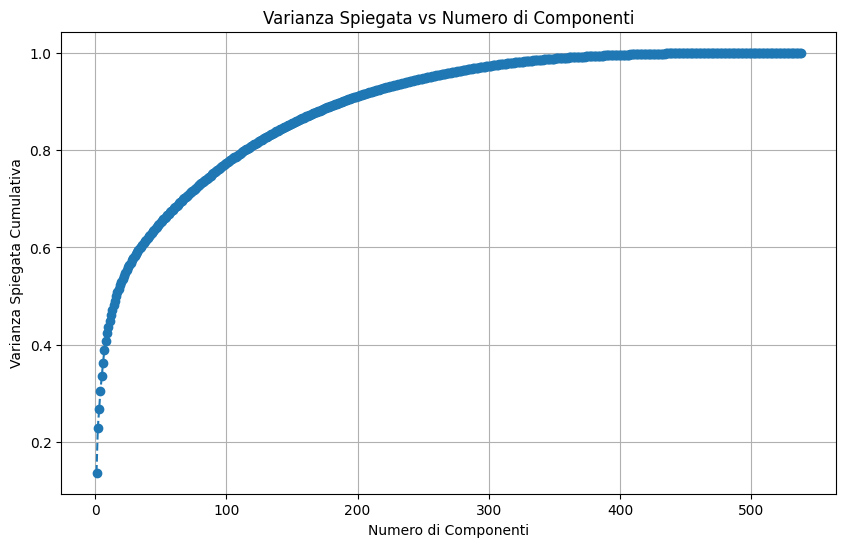

Numero di componenti scelto: 255


In [8]:
# Calcola la varianza spiegata cumulativa
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Visualizza la varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata vs Numero di Componenti')
plt.grid()
plt.show()

# Seleziona il numero di componenti per spiegare il 95% della varianza
n_components = next(i for i, v in enumerate(explained_variance_ratio) if v >= 0.95) + 1
print(f"Numero di componenti scelto: {n_components}")


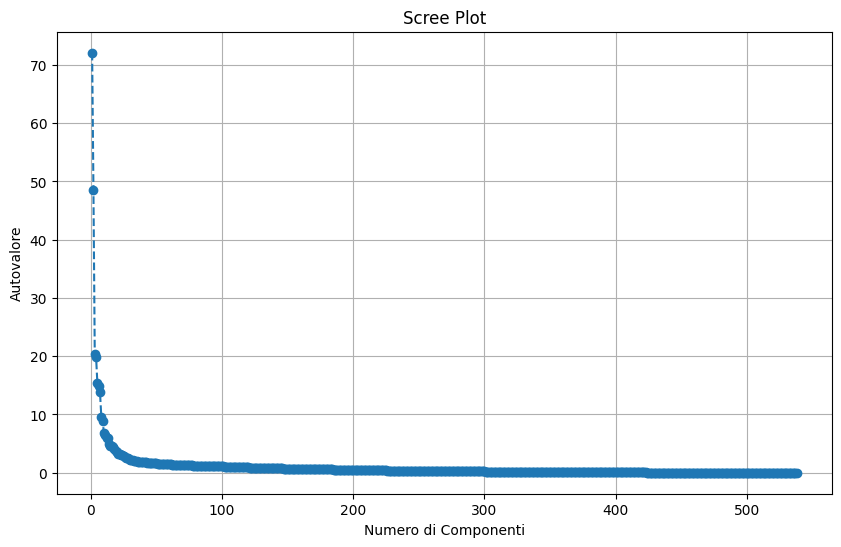

In [8]:
# Autovalori delle componenti principali
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Autovalore')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [9]:
# selezione le componenti principali che spiegano il 95% della varianza

# Trasforma il dataset usando il numero selezionato di componenti principali
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_features)

# Crea il nuovo dataset con le PC e il target
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

# Aggiungi il target (Position) al dataset delle PC
pca_df['Position'] = metadata['Position']
pca_df['Subject'] = metadata['Subject']

# Salva il dataset pronto per il training
output_path = "/Volumes/Mac/DatasetSP/preprocessed/feature_selected/dataset_with_pcs_train.csv"
pca_df.to_csv(output_path, index=False)
print(f"Dataset pronto per il training salvato in: {output_path}")

Dataset pronto per il training salvato in: /Volumes/Mac/DatasetSP/preprocessed/feature_selected/dataset_with_pcs_train.csv
